In [1]:

# load the modules
from los_core import DREAMS_MASTERSHEET
#multiples outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from re import sub
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from plotnine import *

pipo = list(DREAMS_MASTERSHEET.agyw_period_range.unique())
pipo.append("Total")
sorted(list(DREAMS_MASTERSHEET.age_range.unique())[1:4])
sorted(pipo)

['0-6 months', '07-12 months', '13-24 months', '25+ months', 'Total']

# Indicator

In [2]:
class AgywPrev:
    """A class with properties and methods given the results of the indicator AGYW_PREV DATIM""" 
    __who_am_I ="DATIM"
    __datim1_title="Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package."
    __datim2_title="Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service."
    __datim3_title="Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services."
    
    def __repr__(self):
        return f"<AgywPrev {self.__i_am}>"
    
    def __str__(self):
        return f"<AgywPrev {self.__i_am}>"
    
    @classmethod
    def datim_titleI(cls):
        return cls.__datim1_title
    
    @classmethod
    def datim_titleII(cls):
        return cls.__datim2_title
    
    @classmethod
    def datim_titleIII(cls):
        return cls.__datim3_title
    
    
    def __init__(self,commune=None):
        self.__commune = commune
        self.__i_am = f"{AgywPrev.__who_am_I}"
        self.__data =  DREAMS_MASTERSHEET
        self. __total_mastersheet = self.__data.code.count()
        if self.__commune == None:
            self.__dreams_valid = self.__data[(self.__data.age_range !="not_valid_age") & (self.__data.age_range != "25-29") & (self.__data.timeOn_system == "required_Time_on")]
        else:
            self.__dreams_valid = self.__data[(self.__data.age_range !="not_valid_age") & (self.__data.age_range != "25-29") & (self.__data.timeOn_system == "required_Time_on")&(self.__data.actual_commune == f"{self.__commune}")]
        self.__total_dreams_valid = self.__dreams_valid.code.count()
        self.__dreams_valid["primary_only"] = self.__dreams_valid.apply(lambda df: self.__primFunc(df),axis=1)
        self.__dreams_valid["primary_and_OneSecondary_services"] = self.__dreams_valid.apply(lambda df: self.__primLeastOneSecFunc(df),axis=1)
        self.__dreams_valid["partial_primary_services"] = self.__dreams_valid.apply(lambda df: self.__primPartFunc(df),axis=1)
        self.__agyw_prevI = self.__dreams_valid[self.__dreams_valid.primary_only == "full_primary_only"]
        self.__agyw_prevII = self.__dreams_valid[self.__dreams_valid.primary_and_OneSecondary_services == "full_primary_leastOneSecondary"]
        self.__agyw_prevIII = self.__dreams_valid[self.__dreams_valid.partial_primary_services == "primary_part_services"]  
        self.__agyw_prevI_total = self.__agyw_prevI.code.count()
        self.__agyw_prevII_total = self.__agyw_prevII.code.count()
        self.__agyw_prevIII_total = self.__agyw_prevIII.code.count()
        self.__total_datim = self.__agyw_prevI_total + self.__agyw_prevII_total + self.__agyw_prevIII_total
        
        
    @property
    def who_am_i(self):
        return self.__i_am
    
    @property
    def data_mastersheet(self):
        return self.__data
    
    @property
    def data_dreams_valid(self):
        return self.__dreams_valid

    @property
    def total_mastersheet(self):
        return self.__total_mastersheet

    @property
    def total_dreams_valid(self):
        return self.__total_dreams_valid
    
    def __primFunc(self,df):
        if (df.ps_10_14 == "curriculum-servis" and df.hts == "errata" and df.condoms == "errata" and df.post_care_treatment == "no" and df.socio_eco_app == "no" ):
        #if (df.ps_10_14 == "curriculum-servis" and df.hts == "errata" and df.init_prep=="errata" and df.new_condoms == "no" and df.post_care_treatment == "no" and df.socio_eco_app == "no" ): 
            return "full_primary_only"
        elif (df.ps_15_19 == "condoms&curriculum" and df.hts == "errata" and df.post_care_treatment == "no" and df.socio_eco_app == "no" ):
        #elif (df.ps_15_19 == "condoms&curriculum" and df.hts == "errata" and df.init_prep=="errata"  and df.post_care_treatment == "no" and df.socio_eco_app == "no" ):
            return "full_primary_only"
        elif (df.ps_20_24 == "condoms&hts&curriculum"  and df.post_care_treatment == "no" and df.socio_eco_app == "no" ):
        #elif (df.ps_20_24 == "condoms&curriculum" and df.hts == "errata" and df.init_prep=="errata"  and df.post_care_treatment == "no" and df.socio_eco_app == "no" ):
            return "full_primary_only"
        else:
            return "invalid"
    
    def __primLeastOneSecFunc(self,df):
        if (df.ps_10_14 == "curriculum-servis") and (df.hts == "tested_on_given_date"  or df.condoms == "tested_on_given_date" or df.post_care_treatment == "service_gyneco_vbg" or df.socio_eco_app == "service_muso_gardening" ):
        #if (df.ps_10_14 == "curriculum-servis") and (df.hts == "tested_on_given_date" or df.init_prep=="tested_on_given_date" or df.new_condoms == "sensOuRecu" or df.post_care_treatment == "service_gyneco_vbg" or df.socio_eco_app == "service_muso_gardening" ):
            return "full_primary_leastOneSecondary"
        elif (df.ps_15_19 == "condoms&curriculum") and (df.hts == "tested_on_given_date" or df.post_care_treatment == "service_gyneco_vbg" or df.socio_eco_app == "service_muso_gardening" ):
        #elif (df.ps_15_19 == "condoms&curriculum") and (df.hts == "tested_on_given_date" or df.init_prep=="tested_on_given_date" or df.post_care_treatment == "service_gyneco_vbg" or df.socio_eco_app == "service_muso_gardening" ):
            return "full_primary_leastOneSecondary"
        elif (df.ps_20_24 == "condoms&hts&curriculum") and (df.post_care_treatment == "service_gyneco_vbg" or df.socio_eco_app == "service_muso_gardening" ):
        #elif (df.ps_20_24 == "condoms&curriculum") and (df.hts == "tested_on_given_date" or df.init_prep=="tested_on_given_date"  or df.post_care_treatment == "service_gyneco_vbg" or df.socio_eco_app == "service_muso_gardening" ):
            return "full_primary_leastOneSecondary"
        else:
            return "invalid"
        
    def __primPartFunc(self,df):
        if (df.age_range == "15-19") and ((df.condoms == "tested_on_given_date" and df.dreams_curriculum == "curriculum_inc") or (df.condoms == "errata" and df.dreams_curriculum == "curriculum_completed")): 
        #if (df.age_range == "15-19") and ((df.new_condoms == "sensOuRecu" and df.dreams_curriculum == "curriculum_inc") or (df.new_condoms == "no" and df.dreams_curriculum == "curriculum_completed")): 
            return "primary_part_services"
        elif (df.age_range == "20-24") and ((df.dreams_curriculum == "curriculum_completed" and df.condoms=="errata" and df.hts=="errata")or(df.dreams_curriculum == "curriculum_completed" and df.condoms=="tested_on_given_date" and df.hts=="errata")or(df.dreams_curriculum == "curriculum_completed" and df.condoms=="errata" and df.hts=="tested_on_given_date")or(df.dreams_curriculum == "curriculum_inc" and df.condoms=="tested_on_given_date" and df.hts=="errata")or(df.dreams_curriculum == "curriculum_inc" and df.condoms=="errata" and df.hts=="tested_on_given_date")or(df.dreams_curriculum == "curriculum_inc" and df.condoms=="tested_on_given_date" and df.hts=="tested_on_given_date")):
        #elif (df.age_range == "20-24") and ((df.new_condoms == "sensOuRecu" and df.dreams_curriculum == "curriculum_inc") or (df.new_condoms == "no" and df.dreams_curriculum == "curriculum_completed")):
            return "primary_part_services"
        else:
            return "invalid"
         
    @property
    def total_datimI(self):
        return self.__agyw_prevI_total
    
    @property
    def total_datimII(self):
        return self.__agyw_prevII_total
    
    @property
    def total_datimIII(self):
        return self.__agyw_prevIII_total
    
    @property
    def total_datim_general(self):
        return self.__total_datim
    
    @property
    def data_agyw_prevI(self):
        return self.__agyw_prevI

    @property
    def data_agyw_prevII(self):
        return self.__agyw_prevII

    @property
    def data_agyw_prevIII(self):
        return self.__agyw_prevIII

    __PERIOD_DATIM = sorted(list(DREAMS_MASTERSHEET.agyw_period_range.unique()))
    __PERIOD_DATIM.append("Total")
    __AGE_DATIM = sorted(list(DREAMS_MASTERSHEET.age_range.unique())[1:4])
    def datim_agyw_prevI(self):
        
        try:
            pivotableI = self.__agyw_prevI.rename(columns={"age_range":"Age", "agyw_period_range":"Time"})
            agyw_prevI_pivot = pivotableI.pivot_table(index="Age",columns="Time", values="code",aggfunc="count",fill_value=0,margins=True,margins_name="Total",dropna=False)[:-1]
            columns_pivotI = list(agyw_prevI_pivot.columns)
            indexes_pivotI = list(agyw_prevI_pivot.index)
            for period in AgywPrev.__PERIOD_DATIM:
                if period not in columns_pivotI:
                    agyw_prevI_pivot[period] = 0
            for age in AgywPrev.__AGE_DATIM:
                if age not in indexes_pivotI:
                    agyw_prevI_pivot.loc[age] = 0
            agyw_prevI_pivot = agyw_prevI_pivot.reindex(index=AgywPrev.__AGE_DATIM, columns =AgywPrev.__PERIOD_DATIM)
            agyw_prevI_pivot_final = agyw_prevI_pivot.reset_index().rename_axis(None, axis=1)
            agyw_prevI_results_final = DataFrame( agyw_prevI_pivot_final.to_records(index=False))
        except ValueError:
            agyw_prevI_results_final = DataFrame({"Age":["10-14","15-19",
                "20-24"],
                "0-6 months":[0,0,0],
                "07-12 months":[0,0,0],
                "13-24 months":[0,0,0],
                "25+ months":[0,0,0],
                "Total":[0,0,0]
            })
        return agyw_prevI_results_final
    
    def datim_agyw_prevII(self):
        try:
            pivotableII = self.__agyw_prevII.rename(columns={"age_range":"Age", "agyw_period_range":"Time"})
            agyw_prevII_pivot = pivotableII.pivot_table(index="Age",columns="Time", values="code",aggfunc="count",fill_value=0,margins=True,margins_name="Total",dropna=False)[:-1]
            columns_pivotII = list(agyw_prevII_pivot.columns)
            indexes_pivotII = list(agyw_prevII_pivot.index)
            for period in AgywPrev.__PERIOD_DATIM:
                if period not in columns_pivotII:
                    agyw_prevII_pivot[period] = 0
            for age in AgywPrev.__AGE_DATIM:
                if age not in indexes_pivotII:
                    agyw_prevII_pivot.loc[age] = 0
            agyw_prevII_pivot = agyw_prevII_pivot.reindex(index=AgywPrev.__AGE_DATIM,columns =AgywPrev.__PERIOD_DATIM)            
            agyw_prevII_pivot_final = agyw_prevII_pivot.reset_index().rename_axis(None, axis=1)
            agyw_prevII_results_final = DataFrame( agyw_prevII_pivot_final.to_records(index=False))
        except ValueError:
            agyw_prevII_results_final = DataFrame({"Age":["10-14", "15-19",
                "20-24"],
                "0-6 months":[0,0,0],
                "07-12 months":[0,0,0],
                "13-24 months":[0,0,0],
                "25+ months":[0,0,0],
                "Total":[0,0,0]
            })
        return agyw_prevII_results_final
    
    def datim_agyw_prevIII(self):
        try:
            pivotableIII = self.__agyw_prevIII.rename(columns={"age_range":"Age", "agyw_period_range":"Time"})
            agyw_prevIII_pivot = pivotableIII.pivot_table(index="Age",columns="Time", values="code",aggfunc="count",fill_value=0,margins=True,margins_name="Total",dropna=False)[:-1]
            columns_pivotIII = list(agyw_prevIII_pivot.columns)
            indexes_pivotIII = list(agyw_prevIII_pivot.index)
            for period in AgywPrev.__PERIOD_DATIM:
                if period not in columns_pivotIII:
                    agyw_prevIII_pivot[period] = 0
            for age in AgywPrev.__AGE_DATIM:
                if age not in indexes_pivotIII:
                    agyw_prevIII_pivot.loc[age] = 0
            agyw_prevIII_pivot = agyw_prevIII_pivot.reindex(index=AgywPrev.__AGE_DATIM,columns =AgywPrev.__PERIOD_DATIM)
            agyw_prevIII_pivot_final = agyw_prevIII_pivot.reset_index().rename_axis(None, axis=1)
            agyw_prevIII_results_final = DataFrame( agyw_prevIII_pivot_final.to_records(index=False))
        except ValueError:
            agyw_prevIII_results_final = DataFrame({"Age":["10-14",                     "15-19",
                "20-24"],
                "0-6 months":[0,0,0],
                "07-12 months":[0,0,0],
                "13-24 months":[0,0,0],
                "25+ months":[0,0,0],
                "Total":[0,0,0]
            })
        return agyw_prevIII_results_final

In [3]:
#%%capture
datim = AgywPrev()

<ipython-input-2-138747d03e18>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-2-138747d03e18>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-2-138747d03e18>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [4]:
datim.total_mastersheet 
datim.total_dreams_valid
datim.who_am_i
datim.total_datimI
datim.total_datimII
datim.total_datimIII
datim.total_datim_general
AgywPrev.datim_titleI()
datim.datim_agyw_prevI()
AgywPrev.datim_titleII()
datim.datim_agyw_prevII()
AgywPrev.datim_titleIII()
datim.datim_agyw_prevIII()

9234

2907

'DATIM'

175

28

513

716

'Number of individual AGYW that have fully completed the entire DREAMS primary package of services but have not received any services beyond the primary package.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,151,0,0,151
1,15-19,0,23,0,0,23
2,20-24,0,1,0,0,1


'Number of individual AGYW that have fully completed the entire DREAMS primary package of services AND at least one additional secondary service.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,20,0,0,20
1,15-19,0,8,0,0,8
2,20-24,0,0,0,0,0


'Number of individual AGYW that have fully completed at least one DREAMS primary package of services but not the full primary package of services.'

,Age,0-6 months,07-12 months,13-24 months,25+ months,Total
0,10-14,0,0,0,0,0
1,15-19,77,244,0,0,321
2,20-24,71,121,0,0,192


# Indicator Communes

In [5]:
class AgywPrevCommune(AgywPrev):
    """A class that extend AgywPrev with the purpose of the indicator AGYW_PREV DATIM by commune"""
    __who_am_I ="DATIM"
    def __init__(self,name):
        self.__name = name
        self.__i_am = f"{AgywPrevCommune.__who_am_I} {self.__name}"
        #self.__data =  DREAMS_MASTERSHEET
        super().__init__(self.__name)
        
    @property
    def who_am_i(self):
        return self.__i_am
    
    def __repr__(self):
        return f"<AgywPrevCommune {self.__i_am}>"
    
    def __str__(self):
        return f"<AgywPrevCommune {self.__i_am}>"
      
        
    
        

DREAMS_MASTERSHEET.actual_commune.unique()

        

array(['Verrettes', 'Delmas', 'Port-au-Prince', 'Carrefour', 'Limonade',
       'Plaine-du-Nord', 'Cap-Haïtien', 'Kenscoff', 'Dessalines',
       'Pétionville', 'Milot', 'Quartier-Morin', 'La Chapelle',
       'Gressier', 'Saint-Marc', "Petite Rivière de l'Artibonite",
       'Grande Saline', 'Liancourt', 'Tabarre', 'Montrouis', 'Desdunes'],
      dtype=object)

In [6]:
%%capture
def name_handler(s):
    s = sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespace with a single dash
    s = sub(r"\s+", '_', s)
    return s

datimcommunes = []

for columns in DREAMS_MASTERSHEET.actual_commune.unique():
    globals()[f"datim_{name_handler(columns)}"] = AgywPrevCommune(f"{columns}")
    datimcommunes.append(globals().get(f"datim_{name_handler(columns)}"))
   

In [7]:
%%capture
for dcommunes in datimcommunes:
  dcommunes.total_mastersheet 
  dcommunes.total_dreams_valid
  dcommunes.who_am_i
  dcommunes.total_datimI
  dcommunes.total_datimII
  dcommunes.total_datimIII
  dcommunes.total_datim_general
  AgywPrevCommune.datim_titleI()
  dcommunes.datim_agyw_prevI()
  AgywPrevCommune.datim_titleII()
  dcommunes.datim_agyw_prevII()
  AgywPrevCommune.datim_titleIII()
  dcommunes.datim_agyw_prevIII()
  print(" ")
  print(" ")
  print(" ")
  print(" ")

# Graphes

In [8]:
datim.total_datim_general
target= 18000

data_plot = pd.DataFrame({"state":["Target","AGYW_PREV results"],
                            "data": [target,datim.total_datim_general]                        
})

716

(<Figure size 1152x576 with 1 Axes>, <AxesSubplot:>)

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0.98, 'AGYW_PREV datim indicator  and the periodic target')

Text(0.0, 9000.0, '18000')

Text(1.0, 358.0, '716')

Text(-80, -20, 'source: HIVHaiti')

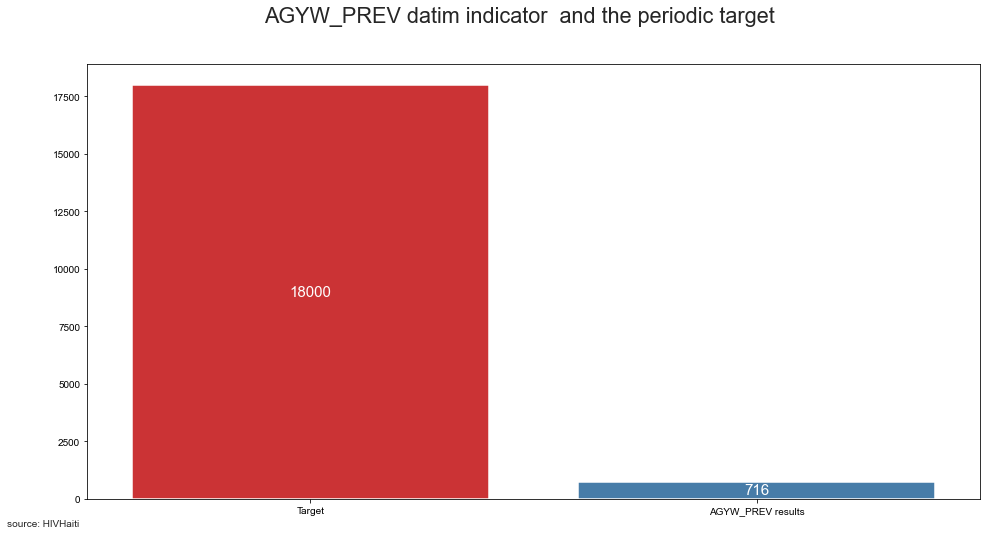

In [9]:
plt.subplots(figsize=(16,8))
sns.set_theme(style="white", context="talk")
sns.set_style("darkgrid")
sns.set_palette("Set1")
splot = sns.barplot(x="state",y="data",data=data_plot)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("AGYW_PREV datim indicator  and the periodic target")
for p in splot.patches:
    height = p.get_height()
    plt.text(
                p.get_x() + p.get_width()/2, 
                0.5*p.get_height() + p.get_y(),
                '{:1.0f}'.format(height), 
                ha='center', va='center',
                size=15,
                fontdict=dict(color="white",fontsize=15)
            )
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)
plt.savefig("agyw_prev_evolution_core",dpi=1000)

In [10]:
stack_data = pd.DataFrame( 
                  {     
                        "supp":["target","indicateur","indicateur","indicateur"],
                        "label": ["target","composante I","composante II","composante III"],
                        "data": [target,datim.total_datimI,
                                datim.total_datimII,
                                datim.total_datimIII]
                  })

stack_data


,supp,label,data
0,target,target,18000
1,indicateur,composante I,175
2,indicateur,composante II,28
3,indicateur,composante III,513


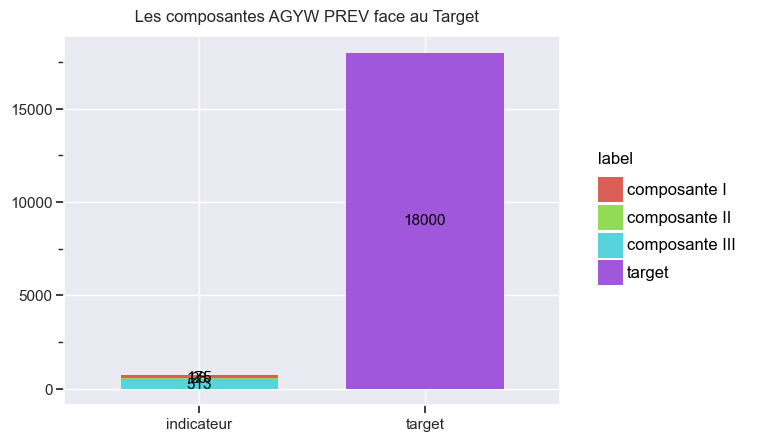

<ggplot: (120770712866)>

C:\Users\Wedner Adrien\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\Wedner Adrien\AppData\Local\Programs\Python\Python39\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: composante_agywprev_core.png


In [11]:
p = (ggplot(stack_data,aes(x="supp",y="data",fill="label",width=0.7)) 
 + geom_bar(position=position_stack(vjust=0.5),stat="identity")
 + geom_text(aes(label="data"),position=position_stack(vjust=0.5))
 + ggtitle(" Les composantes AGYW PREV face au Target")
 + xlab("")
 +ylab("")
 +labs(caption =  "HIVHaiti")
 + theme_seaborn()
)
p
ggsave(plot=p,filename="composante_agywprev_core.png",dpi=1000)

In [12]:
composanteI_Q1 = datim.data_agyw_prevI
composanteII_Q1 = datim.data_agyw_prevII
composanteIII_Q1 = datim.data_agyw_prevIII

In [13]:
frames = [composanteI_Q1, composanteII_Q1, composanteIII_Q1]

Q1 = pd.concat(frames)
Q1.code.count()

716

In [14]:
table_Q1 = pd.ExcelWriter(f"Q1FY21.xlsx",engine="xlsxwriter")
composanteI_Q1.to_excel(table_Q1,sheet_name="composanteI_Q1",index=False,na_rep="NULL")
composanteII_Q1.to_excel(table_Q1,sheet_name="composanteII_Q1",index=False,na_rep="NULL")
composanteIII_Q1.to_excel(table_Q1,sheet_name="composanteIII_Q1",index=False,na_rep="NULL")
Q1.to_excel(table_Q1,sheet_name="Q1",index=False,na_rep="NULL")
table_Q1.save()

# Verification Total datim commune

In [15]:

def check_total_communes() :
    total = 0
    for dcommunes in datimcommunes:
        total += dcommunes.total_datim_general
    return total   

In [16]:
check_total_communes()

716

In [17]:
datimcommunes

[<AgywPrevCommune DATIM Verrettes>,
 <AgywPrevCommune DATIM Delmas>,
 <AgywPrevCommune DATIM Port-au-Prince>,
 <AgywPrevCommune DATIM Carrefour>,
 <AgywPrevCommune DATIM Limonade>,
 <AgywPrevCommune DATIM Plaine-du-Nord>,
 <AgywPrevCommune DATIM Cap-Haïtien>,
 <AgywPrevCommune DATIM Kenscoff>,
 <AgywPrevCommune DATIM Dessalines>,
 <AgywPrevCommune DATIM Pétionville>,
 <AgywPrevCommune DATIM Milot>,
 <AgywPrevCommune DATIM Quartier-Morin>,
 <AgywPrevCommune DATIM La Chapelle>,
 <AgywPrevCommune DATIM Gressier>,
 <AgywPrevCommune DATIM Saint-Marc>,
 <AgywPrevCommune DATIM Petite Rivière de l'Artibonite>,
 <AgywPrevCommune DATIM Grande Saline>,
 <AgywPrevCommune DATIM Liancourt>,
 <AgywPrevCommune DATIM Tabarre>,
 <AgywPrevCommune DATIM Montrouis>,
 <AgywPrevCommune DATIM Desdunes>]

Port-au-prince:
 - self, delmas, carrefour, petionvilles, tabarre, gressier

Cap-Haitien:
- self, plaine du nord, milot, limonade, quartier morin

St Marc:
- self, verretes, montrouis, la chapelle, liancourt

dessalines:
- self, desdunes, grande saline, petite rivere de lartibonite, 


In [30]:
def arrondissement_PAP():
    apap = [datim_PortauPrince.total_datim_general,
                datim_Delmas.total_datim_general,
                datim_Pétionville.total_datim_general,
                datim_Tabarre.total_datim_general,
                datim_Gressier.total_datim_general,
                datim_Kenscoff.total_datim_general,
                datim_Carrefour.total_datim_general
    ]
    return sum(apap)

def arrondissement_CAP():
    acap = [datim_CapHaïtien.total_datim_general,
                datim_PlaineduNord.total_datim_general,
                datim_Milot.total_datim_general,
                datim_Limonade.total_datim_general,
                datim_QuartierMorin.total_datim_general
    ]
    return sum(acap) 

def arrondissement_SM():
    asm = [datim_SaintMarc.total_datim_general,
                datim_Verrettes.total_datim_general,
                datim_La_Chapelle.total_datim_general,
                datim_Montrouis.total_datim_general,
                datim_Liancourt.total_datim_general
    ]
    return sum(asm)

def arrondissement_DESS():
    adess = [datim_Dessalines.total_datim_general,
                datim_Desdunes.total_datim_general,
                datim_Grande_Saline.total_datim_general,
                datim_Petite_Rivière_de_lArtibonite.total_datim_general,
    ]
    return sum(adess)

In [31]:
sum([
     arrondissement_PAP(),
     arrondissement_CAP(),
     arrondissement_SM(),
     arrondissement_DESS()       
])

716